In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tqdm
import duckdb
import matplotlib.pyplot as plt
import pandas as pd

from rtb.datasets import get_dataset
from rtb.utils import one_window_sampler, rolling_window_sampler

In [3]:
ds = get_dataset(name="rtb-product", root="../../data", processed=True)

loading table ../../data/rtb-product/processed/db/customer.parquet...
done in 0.57 seconds.
loading table ../../data/rtb-product/processed/db/product.parquet...
done in 1.71 seconds.
loading table ../../data/rtb-product/processed/db/review.parquet...
done in 46.13 seconds.


In [4]:
db = ds._db

In [5]:
customer = db.tables["customer"].df
product = db.tables["product"].df
review = db.tables["review"].df

In [6]:
customer

,customer_id,customer_name
0,0,TW Ervin II
1,1,Amazon Customer
2,2,Tekla Borner
3,3,Deborah K Woroniecki
4,4,E
...,...,...
1850188,21931037,Amazon Customer
1850189,21931038,James Olson
1850190,21933864,Jamaree
1850191,21933879,joeb


In [7]:
product

,product_id,category,brand,title,description,price
0,0,"[Books, Children's Books, Literature & Fiction]",Visit Amazon's Nancy Gurney Page,"King, the Mice and the Cheese (Beginner Books)","THE KING, THE MICE AND THE CHEESE follows a fo...",12.33
1,1,"[Books, Children's Books, Literature & Fiction]",Louis (ed) UNTERMEYER,The golden treasury of poetry,Collection of Poetry,23.98
2,2,"[Books, Children's Books, Growing Up & Facts o...",Visit Amazon's Joan Walsh Anglund Page,Love is a Special Way of Feeling,"""Love is a special way of feeling...Love is fo...",5.49
3,3,"[Books, Children's Books, Humor]",Visit Amazon's Dr Seuss Page,Great Day for Up,"""[Dr. Seuss] has...instilled a lifelong love o...",10.53
4,4,"[Books, Travel, Travel Writing]",Visit Amazon's Christopher Kremmer Page,The Carpet Wars: From Kabul to Baghdad A Ten-Y...,"Book by Kremmer, Christopher.",6.97
...,...,...,...,...,...,...
506007,506007,None,Visit Amazon's Shelby Reed Page,Seraphim by Shelby Reed (2005-12-04),None,50.33
506008,506008,None,,Daphne's Diary Number 3 2016,None,49.91
506009,506009,None,,DC UNIVERSE REBIRTH #1 MIDNIGHT RELEASE VAR ED...,The next stage of the DC Universe begins here!...,5.49
506010,506010,None,The Source,The Source Magazine Special Prince Tribute Cov...,"On April 21, 2016, Prince Rogers Nelson, known...",34.99


In [8]:
review

,review_time,customer_id,product_id,rating,verified,review_text,summary
0,2005-03-30,0,0,5.0,False,"The King, the Mice and the Cheese by Nancy Gur...",A story children will love and learn from
1,2016-06-20,1,0,5.0,True,The kids loved it!,Five Stars
2,2016-01-24,2,0,5.0,True,My students (3 & 4 year olds) loved this book!...,Five Stars
3,2015-07-09,3,0,5.0,False,LOVE IT,Five Stars
4,2015-01-18,4,0,5.0,True,Great!,Five Stars
...,...,...,...,...,...,...,...
21935279,2017-10-18,328731,506011,5.0,True,Have just started reading this book and am loo...,... reading this book and am looking forward t...
21935280,2017-05-08,365700,506011,5.0,True,I'm learning quite a bit about the Amish cultu...,Nice series
21935281,2017-01-10,648402,506011,5.0,True,THIS SERIES IS EXCELLENT. I WOULD RECOMMEND R...,MASON JAR MAYHEM
21935282,2016-08-22,1254547,506011,5.0,True,was so glad to get this book. it arrived in g...,Five Stars


In [37]:
time_window_df = rolling_window_sampler(ds.min_time, ds.train_max_time, pd.Timedelta("52W"), pd.Timedelta("52W"))

In [38]:
time_window_df

,window_min_time,window_max_time
0,1996-06-25 00:00:01,1997-06-24 00:00:01
1,1997-06-24 00:00:01,1998-06-23 00:00:01
2,1998-06-23 00:00:01,1999-06-22 00:00:01
3,1999-06-22 00:00:01,2000-06-20 00:00:01
4,2000-06-20 00:00:01,2001-06-19 00:00:01
5,2001-06-19 00:00:01,2002-06-18 00:00:01
6,2002-06-18 00:00:01,2003-06-17 00:00:01
7,2003-06-17 00:00:01,2004-06-15 00:00:01
8,2004-06-15 00:00:01,2005-06-14 00:00:01
9,2005-06-14 00:00:01,2006-06-13 00:00:01


In [39]:
# time_window_df = one_window_sampler(ds.val_max_time, pd.Timedelta("26W"))

In [40]:
# time_window_df

In [41]:
df = duckdb.sql("""
SELECT
    window_min_time,
    window_max_time,
    customer_id,
    SUM(price) AS ltv,
    COUNT(price) as count
FROM
    time_window_df, review, product
WHERE
    review.product_id = product.product_id AND
    review_time BETWEEN window_min_time AND window_max_time
GROUP BY
    window_min_time, window_max_time, customer_id
""").df()

In [42]:
df.sort_values("count").tail(100)

,window_min_time,window_max_time,customer_id,ltv,count
680500,2011-06-07 00:00:01,2012-06-05 00:00:01,98021,3148.11,259
1483459,2005-06-14 00:00:01,2006-06-13 00:00:01,50355,3414.46,259
722658,2012-06-05 00:00:01,2013-06-04 00:00:01,7227,4091.72,259
298265,2011-06-07 00:00:01,2012-06-05 00:00:01,865,3091.81,260
865931,2012-06-05 00:00:01,2013-06-04 00:00:01,276371,2374.69,260
...,...,...,...,...,...
388140,2012-06-05 00:00:01,2013-06-04 00:00:01,31490,9239.28,685
1292882,2006-06-13 00:00:01,2007-06-12 00:00:01,18612,9690.61,701
156286,2011-06-07 00:00:01,2012-06-05 00:00:01,2611,11960.52,704
1355493,2007-06-12 00:00:01,2008-06-10 00:00:01,18612,10339.22,770


<Axes: >

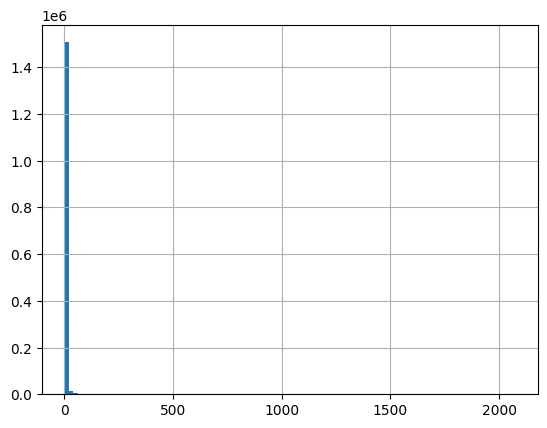

In [43]:
df["count"].hist(bins=100)

In [50]:
ltv = duckdb.sql(
    r"""
    SELECT
        window_min_time,
        window_max_time,
        customer_id,
        (
            SELECT COALESCE(SUM(price), 0)
            FROM review, product
            WHERE
                review.customer_id = customer.customer_id AND
                review.product_id = product.product_id AND
                review.review_time BETWEEN window_min_time AND window_max_time
        ) AS ltv
    FROM
        time_window_df,
        customer
    """
).df()
ltv

,window_min_time,window_max_time,customer_id,ltv
0,1996-06-25 00:00:01,1997-06-24 00:00:01,18906116,0.0
1,1996-06-25 00:00:01,1997-06-24 00:00:01,18906717,0.0
2,1996-06-25 00:00:01,1997-06-24 00:00:01,18906790,0.0
3,1996-06-25 00:00:01,1997-06-24 00:00:01,18906917,0.0
4,1996-06-25 00:00:01,1997-06-24 00:00:01,18906953,0.0
...,...,...,...,...
31453276,2012-06-05 00:00:01,2013-06-04 00:00:01,9280708,0.0
31453277,2012-06-05 00:00:01,2013-06-04 00:00:01,9280715,0.0
31453278,2012-06-05 00:00:01,2013-06-04 00:00:01,9280724,0.0
31453279,2012-06-05 00:00:01,2013-06-04 00:00:01,9280744,0.0


In [47]:
duckdb.sql(
    r"""
    SELECT
        window_min_time,
        window_max_time,
        customer_id,
        NOT EXISTS (
            SELECT 1
            FROM review
            WHERE
                review.customer_id = customer.customer_id AND
                review.review_time BETWEEN window_min_time AND window_max_time
        ) AS churn
    FROM
        time_window_df,
        customer
    """
).df()

,window_min_time,window_max_time,customer_id,churn
0,1996-06-25 00:00:01,1997-06-24 00:00:01,18906116,True
1,1996-06-25 00:00:01,1997-06-24 00:00:01,18906717,True
2,1996-06-25 00:00:01,1997-06-24 00:00:01,18906790,True
3,1996-06-25 00:00:01,1997-06-24 00:00:01,18906917,True
4,1996-06-25 00:00:01,1997-06-24 00:00:01,18906953,True
...,...,...,...,...
31453276,2012-06-05 00:00:01,2013-06-04 00:00:01,1899590,True
31453277,2012-06-05 00:00:01,2013-06-04 00:00:01,1899592,True
31453278,2012-06-05 00:00:01,2013-06-04 00:00:01,1899600,True
31453279,2012-06-05 00:00:01,2013-06-04 00:00:01,1899605,True


<Axes: xlabel='churn'>

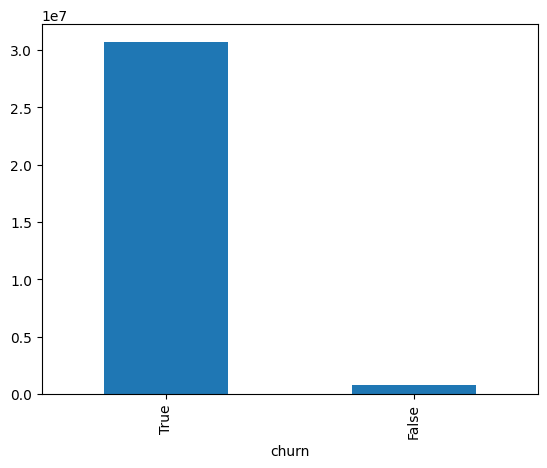

In [48]:
df = _
df["churn"].value_counts().plot(kind="bar")